### Capstone Project
# Opening a Vegetarian Restaurant in Toronto
#### by Christine Brachthäuser

## Part 2 - Income and Age Distribution for Selected Neighborhoods

In [2]:
# The code was removed by Watson Studio for sharing.

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


In [3]:
import json
import numpy as np

import csv


import requests
from pandas.io.json import json_normalize
from time import sleep

import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans 

#!conda install -c conda-forge folium=0.5.0 --yes
#import folium

print('Liberies imported.')

Liberies imported.


In [23]:
df_profiles_income = df_data_1.loc[986:996, ['Characteristic','Casa Loma','University','Waterfront Communities-The Island']].copy()
#df_profiles_income

In [24]:
df_profiles_income['Characteristic']

986                 With after-tax income
987      Percentage with after-tax income
988        Under $10,000 (including loss)
989                    $10,000 to $19,999
990                    $20,000 to $29,999
991                    $30,000 to $39,999
992                    $40,000 to $49,999
993                    $50,000 to $59,999
994                    $60,000 to $69,999
995                    $70,000 to $79,999
996                      $80,000 and over
Name: Characteristic, dtype: object

In [25]:
income_list = ['With after-tax income','Percentage with after-tax income','Under $10,000 (including loss)','$10,000 to 19,999','$20,000 to 29,999',
              '$30,000 to 39,999','$40,000 to 49,999','$50,000 to 59,999','$60,000 to 69,999','$70,000 to 79,999','$80,000 and over']

In [26]:
df_profiles_income['Characteristic'] = income_list
df_profiles_income

,Characteristic,Casa Loma,University,Waterfront Communities-The Island
986,With after-tax income,"9,325","6,015","60,620"
987,Percentage with after-tax income,97.3,97.5,97.8
988,"Under $10,000 (including loss)","1,210","1,230","7,830"
989,"$10,000 to 19,999","1,080","1,135","6,735"
990,"$20,000 to 29,999","1,005",860,"5,700"
991,"$30,000 to 39,999",895,635,"6,120"
992,"$40,000 to 49,999",805,485,"6,880"
993,"$50,000 to 59,999",720,385,"6,565"
994,"$60,000 to 69,999",580,305,"5,650"
995,"$70,000 to 79,999",495,220,"4,385"


In [27]:
df_profiles_income.drop([987], axis=0, inplace=True)
df_profiles_income = df_profiles_income.set_index('Characteristic')
df_profiles_income.head()

,Casa Loma,University,Waterfront Communities-The Island
Characteristic,,,
With after-tax income,"9,325","6,015","60,620"
"Under $10,000 (including loss)","1,210","1,230","7,830"
"$10,000 to 19,999","1,080","1,135","6,735"
"$20,000 to 29,999","1,005",860,"5,700"
"$30,000 to 39,999",895,635,"6,120"


In [28]:
df_profiles_income = df_profiles_income.apply(lambda x:x.str.replace(',',''))

In [29]:
df_profiles_income = df_profiles_income.astype(int)

In [30]:
df_profiles_income 

,Casa Loma,University,Waterfront Communities-The Island
Characteristic,,,
With after-tax income,9325,6015,60620
"Under $10,000 (including loss)",1210,1230,7830
"$10,000 to 19,999",1080,1135,6735
"$20,000 to 29,999",1005,860,5700
"$30,000 to 39,999",895,635,6120
"$40,000 to 49,999",805,485,6880
"$50,000 to 59,999",720,385,6565
"$60,000 to 69,999",580,305,5650
"$70,000 to 79,999",495,220,4385


In [31]:
df_income_percent = df_profiles_income.copy()
df_income_percent = df_income_percent.div(df_income_percent.iloc[0], axis=1)
df_income_percent = np.round(df_income_percent, decimals = 2)
df_income_percent.head()

,Casa Loma,University,Waterfront Communities-The Island
Characteristic,,,
With after-tax income,1.00,1.00,1.00
"Under $10,000 (including loss)",0.13,0.20,0.13
"$10,000 to 19,999",0.12,0.19,0.11
"$20,000 to 29,999",0.11,0.14,0.09
"$30,000 to 39,999",0.10,0.11,0.10


In [32]:
short_list = ['Under 20','Under 20','20-40','20-40','40-60','40-60','60-80','60-80','Over 80']

In [33]:
df_income_percent.drop(df_income_percent.index[0], inplace=True)

In [34]:
df_income_percent.index = short_list
df_income_percent.head()

,Casa Loma,University,Waterfront Communities-The Island
Under 20,0.13,0.20,0.13
Under 20,0.12,0.19,0.11
20-40,0.11,0.14,0.09
20-40,0.10,0.11,0.10
40-60,0.09,0.08,0.11


In [35]:
aggregation_function = {'Casa Loma':'sum','University':'sum','Waterfront Communities-The Island':'sum'}
df_income_percent_grouped = df_income_percent.groupby(df_income_percent.index).aggregate(aggregation_function)

df_income_percent_grouped

,Casa Loma,University,Waterfront Communities-The Island
20-40,0.21,0.25,0.19
40-60,0.17,0.14,0.22
60-80,0.11,0.09,0.16
Over 80,0.27,0.13,0.18
Under 20,0.25,0.39,0.24


In [36]:
df_income_percent_grouped.index.name = 'Individual Income (000$)'
new_index = ['Under 20','20-40','40-60','60-80','Over 80']
df_income_percent_grouped = df_income_percent_grouped.reindex(new_index).reset_index()
df_income_percent_grouped

,Individual Income (000$),Casa Loma,University,Waterfront Communities-The Island
0,Under 20,0.25,0.39,0.24
1,20-40,0.21,0.25,0.19
2,40-60,0.17,0.14,0.22
3,60-80,0.11,0.09,0.16
4,Over 80,0.27,0.13,0.18


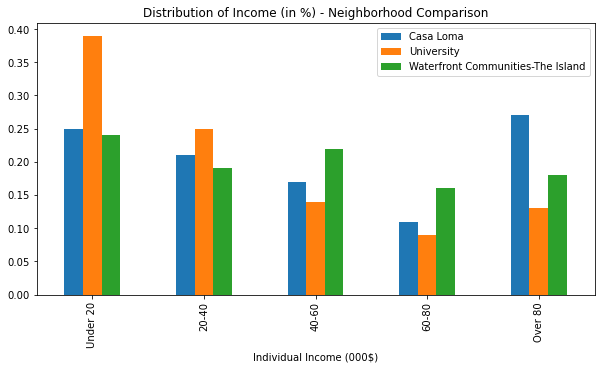

In [37]:
df_income_percent_grouped.plot(x='Individual Income (000$)', kind='bar', stacked=False,
                              title='Distribution of Income (in %) - Neighborhood Comparison', figsize=(10,5), width=0.5)

### Population Pyramid

In [15]:
df_profiles_age = df_data_1.loc[15:56, ['Characteristic','Casa Loma','University','Waterfront Communities-The Island']].copy()
#df_profiles_age.drop(['City of Toronto'], axis=1, inplace = True)
df_profiles_age


,Characteristic,Casa Loma,University,Waterfront Communities-The Island
15,Male: 0 to 04 years,185,115,1080
16,Male: 05 to 09 years,210,85,465
17,Male: 10 to 14 years,225,85,285
18,Male: 15 to 19 years,230,170,570
19,Male: 20 to 24 years,295,590,3100
20,Male: 25 to 29 years,445,585,7875
21,Male: 30 to 34 years,405,410,6580
22,Male: 35 to 39 years,300,315,3725
23,Male: 40 to 44 years,265,210,2255
24,Male: 45 to 49 years,335,175,1675


In [16]:
df_profiles_age = df_profiles_age.reindex([15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,32,33,34,35,36,37,38,31,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56])
df_profiles_age = df_profiles_age.reset_index()
df_profiles_age.head()

,index,Characteristic,Casa Loma,University,Waterfront Communities-The Island
0,15,Male: 0 to 04 years,185,115,1080
1,16,Male: 05 to 09 years,210,85,465
2,17,Male: 10 to 14 years,225,85,285
3,18,Male: 15 to 19 years,230,170,570
4,19,Male: 20 to 24 years,295,590,3100


In [17]:
df_age_men = df_profiles_age.iloc[0:21].copy()
df_age_men.drop(['index'], axis=1, inplace=True)
df_age_men.head()

,Characteristic,Casa Loma,University,Waterfront Communities-The Island
0,Male: 0 to 04 years,185,115,1080
1,Male: 05 to 09 years,210,85,465
2,Male: 10 to 14 years,225,85,285
3,Male: 15 to 19 years,230,170,570
4,Male: 20 to 24 years,295,590,3100


In [18]:
df_age_women = df_profiles_age.iloc[21:42].copy()
df_age_women.drop(['index'], axis=1, inplace=True)
df_age_women.head()

,Characteristic,Casa Loma,University,Waterfront Communities-The Island
21,Female: 0 to 04 years,165,110,1050
22,Female: 05 to 09 years,190,95,455
23,Female: 10 to 14 years,230,80,315
24,Female: 15 to 19 years,220,160,555
25,Female: 20 to 24 years,330,560,3590


In [19]:
df_age_men_list = df_age_men['Characteristic'].tolist()
df_age_men_list = [s.strip('Male:') for s in df_age_men_list]
df_age_men_list = [s.replace('Male:','') for s in df_age_men_list]

df_age_women_list = df_age_women['Characteristic'].tolist()
df_age_women_list = [s.strip('Female:') for s in df_age_women_list]
df_age_women_list = [s.replace('Female:','') for s in df_age_women_list]


In [20]:
df_age_men['Characteristic'] = df_age_men_list
df_age_women['Characteristic'] = df_age_women_list

In [21]:
df_age_men = df_age_men.set_index(['Characteristic'])
df_age_men = df_age_men.astype(int)
df_age_men.head()

,Casa Loma,University,Waterfront Communities-The Island
Characteristic,,,
0 to 04 years,185,115,1080
05 to 09 years,210,85,465
10 to 14 years,225,85,285
15 to 19 years,230,170,570
20 to 24 years,295,590,3100


In [22]:
df_age_women = df_age_women.set_index(['Characteristic'])
df_age_women = df_age_women.astype(int)
df_age_women.head()

,Casa Loma,University,Waterfront Communities-The Island
Characteristic,,,
0 to 04 years,165,110,1050
05 to 09 years,190,95,455
10 to 14 years,230,80,315
15 to 19 years,220,160,555
20 to 24 years,330,560,3590


In [23]:
casa_loma_women = pd.DataFrame(df_age_women['Casa Loma'])
casa_loma_women = casa_loma_women.rename(columns={'Casa Loma':'Females'})
casa_loma_men = pd.DataFrame(df_age_men['Casa Loma'])
casa_loma_men = casa_loma_men.rename(columns={'Casa Loma':'Males'})
casa_loma_men = casa_loma_men.reset_index()

casa_loma = casa_loma_women
casa_loma = casa_loma.reset_index()
casa_loma['Males'] = casa_loma_men['Males']
casa_loma.head()

,Characteristic,Females,Males
0,0 to 04 years,165,185
1,05 to 09 years,190,210
2,10 to 14 years,230,225
3,15 to 19 years,220,230
4,20 to 24 years,330,295


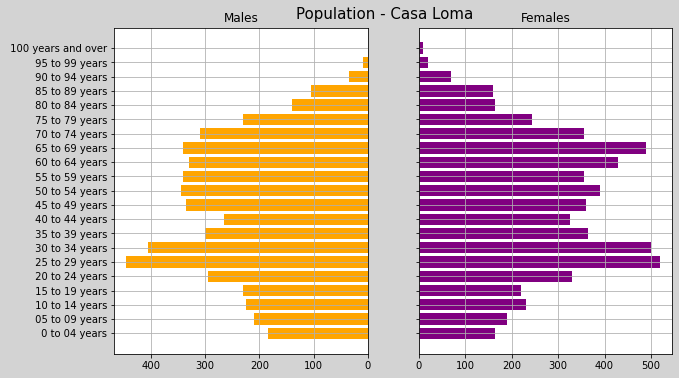

In [24]:
y = range(0, len(casa_loma))
x_males = casa_loma['Males']
x_females = casa_loma['Females']
fig,axes = plt.subplots(ncols=2, sharey=True, figsize=(10,6))
fig.patch.set_facecolor('lightgrey')
plt.figtext(.5,.9, 'Population - Casa Loma', fontsize=15, ha='center')
axes[0].barh(y,x_males, align='center', color='orange')
axes[0].set(title = 'Males')
axes[1].barh(y,x_females, align='center', color='purple')
axes[1].set(title = 'Females')
axes[1].grid()
axes[0].set(yticks = y, yticklabels=casa_loma['Characteristic'])
axes[0].invert_xaxis()
axes[0].grid()
plt1=plt.show()

In [25]:
university_women = pd.DataFrame(df_age_women['University'])
university_women = university_women.rename(columns={'University':'Females'})
university_men = pd.DataFrame(df_age_men['University'])
university_men = university_men.rename(columns={'University':'Males'})
university_men = university_men.reset_index()

university = university_women
university = university.reset_index()
university['Males'] = university_men['Males']
university.head()

,Characteristic,Females,Males
0,0 to 04 years,110,115
1,05 to 09 years,95,85
2,10 to 14 years,80,85
3,15 to 19 years,160,170
4,20 to 24 years,560,590


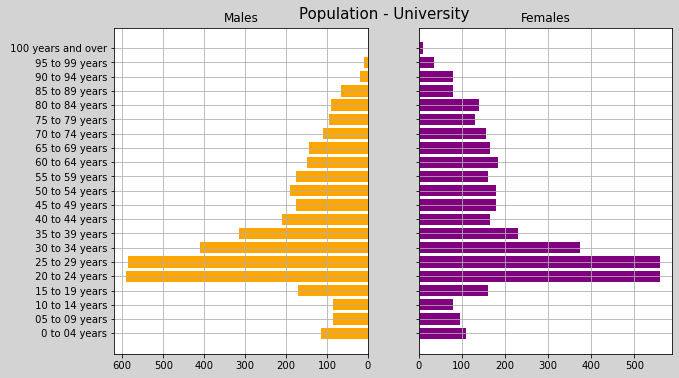

In [26]:
y = range(0, len(university))
x_males = university['Males']
x_females = university['Females']
fig,axes = plt.subplots(ncols=2, sharey=True, figsize=(10,6))
fig.patch.set_facecolor('lightgrey')
plt.figtext(.5,.9, 'Population - University', fontsize=15, ha='center')
axes[0].barh(y,x_males, align='center', color='orange')
axes[0].set(title = 'Males')
axes[1].barh(y,x_females, align='center', color='purple')
axes[1].set(title = 'Females')
axes[1].grid()
axes[0].set(yticks = y, yticklabels=university['Characteristic'])
axes[0].invert_xaxis()
axes[0].grid()
plt1=plt.show()

In [27]:
waterfront_women = pd.DataFrame(df_age_women['Waterfront Communities-The Island'])
waterfront_women = waterfront_women.rename(columns={'Waterfront Communities-The Island':'Females'})
waterfront_men = pd.DataFrame(df_age_men['Waterfront Communities-The Island'])
waterfront_men = waterfront_men.rename(columns={'Waterfront Communities-The Island':'Males'})
waterfront_men = waterfront_men.reset_index()

waterfront = waterfront_women
waterfront = waterfront.reset_index()
waterfront['Males'] = waterfront_men['Males']
waterfront.head()

,Characteristic,Females,Males
0,0 to 04 years,1050,1080
1,05 to 09 years,455,465
2,10 to 14 years,315,285
3,15 to 19 years,555,570
4,20 to 24 years,3590,3100


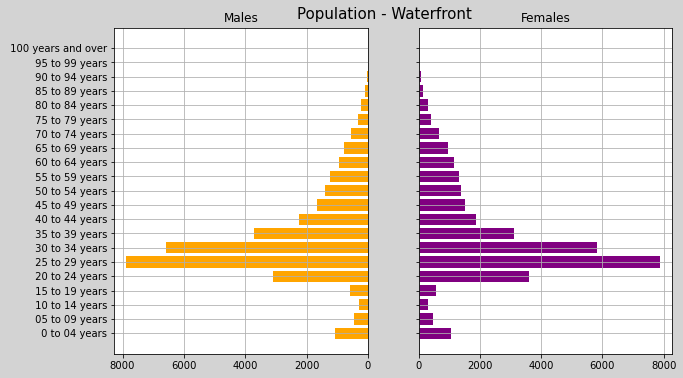

In [28]:
y = range(0, len(waterfront))
x_males = waterfront['Males']
x_females = waterfront['Females']
fig,axes = plt.subplots(ncols=2, sharey=True, figsize=(10,6))
fig.patch.set_facecolor('lightgrey')
plt.figtext(.5,.9, 'Population - Waterfront', fontsize=15, ha='center')
axes[0].barh(y,x_males, align='center', color='orange')
axes[0].set(title = 'Males')
axes[1].barh(y,x_females, align='center', color='purple')
axes[1].set(title = 'Females')
axes[1].grid()
axes[0].set(yticks = y, yticklabels=waterfront['Characteristic'])
axes[0].invert_xaxis()
axes[0].grid()
plt1=plt.show()